# Decision Tree for KickStarProject dataset

Goal: predict state

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [4]:
data_dt = data.copy()
data_dt.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['state'],axis=1)
y = data_dt['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [6]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


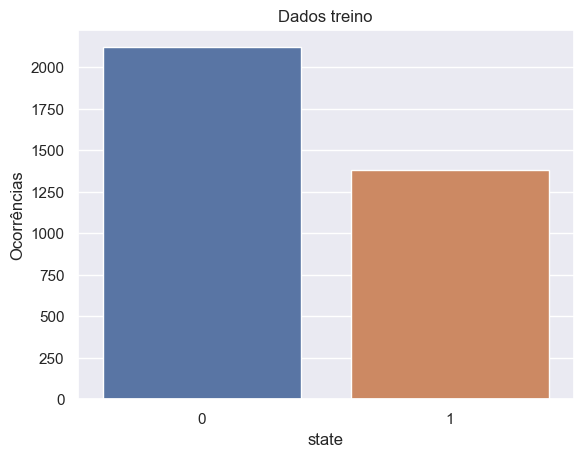

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


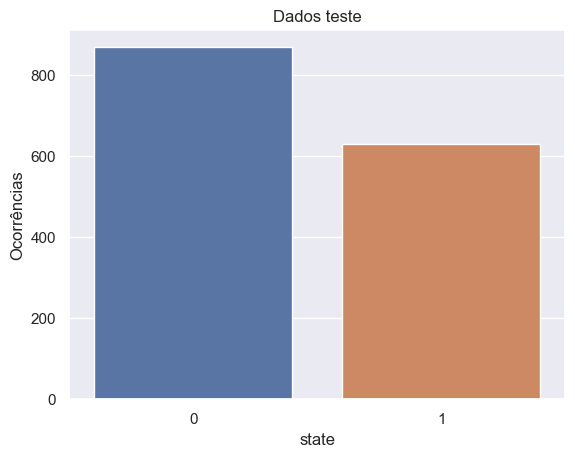

In [7]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')

In [8]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [33]:

X_train_array = X_train.values.reshape(-1, 4)
print(X_train_array)

[[5.362000e+03 1.180000e+02 5.362000e+03 5.362000e+03]
 [1.455000e+03 2.000000e+01 1.455000e+03 1.455000e+03]
 [7.101000e+03 7.600000e+01 7.101000e+03 7.101000e+03]
 ...
 [1.537600e+04 3.600000e+01 2.565035e+04 2.551610e+04]
 [6.095000e+03 8.600000e+01 6.095000e+03 6.095000e+03]
 [5.320000e+03 7.400000e+01 5.320000e+03 5.320000e+03]]


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [12]:
def build_model(activation ='relu', learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(16, input_dim = 4, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1,activation = activation)) #output
    
    #Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model

In [13]:

model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [14]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [15]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2021)

In [16]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split = 0.2, epochs = 20)


In [29]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error',refit = 'True', verbose = 1,error_score='raise',)

In [30]:
grid_search.fit(X_train_array,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
70/70 [==============================] - 1s 6ms/step - loss: 5.7924 - mae: 5.7924 - mse: 13963.6465 - val_loss: 0.4054 - val_mae: 0.4054 - val_mse: 0.4054
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 0.3848 - mae: 0.3848 - mse: 0.3848 - val_loss: 0.4054 - val_mae: 0.4054 - val_mse: 0.4054
Epoch 3/20
70/70 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.3848 - mse: 0.3848 - val_loss: 0.4054 - val_mae: 0.4054 - val_mse: 0.4054
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.3848 - mae: 0.3848 - mse: 0.3848 - val_loss: 0.4054 - val_mae: 0.4054 - val_mse: 0.4054
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 0.3848 - mae: 0.3848 - mse: 0.3848 - val_loss: 0.4054 - val_mae: 0.4054 - val_mse: 0.4054
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 0.3848 - mae: 0.3848 - mse: 0.3848 - val_loss: 0.4054 

KeyboardInterrupt: 

In [19]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.394286 using {'optimizer': 'SGD'}


In [20]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [21]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

-0.394286 (0.013401) with {'optimizer': 'SGD'}
-0.394286 (0.013401) with {'optimizer': 'RMSprop'}
-0.394286 (0.013401) with {'optimizer': 'Adagrad'}


In [22]:
best_mlp_model = grid_search.best_estimator_

In [23]:
best_mlp_model.fit(X_train, y_train, epochs =20, validation_data = (X_test, y_test), verbose =1)

Epoch 1/20
110/110 [==============================] - 2s 6ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 2/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 3/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 4/20
110/110 [==============================] - 0s 4ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 5/20
110/110 [==============================] - 0s 4ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 6/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3943 - mae: 0.3943 - mse: 0.3943 - val_loss: 0.4207 - val_mae: 0.4207 - val_mse: 0.4207
Epoch 7/20
110/1

KerasRegressor(
	model=<function build_model at 0x0000028FCC65BCE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

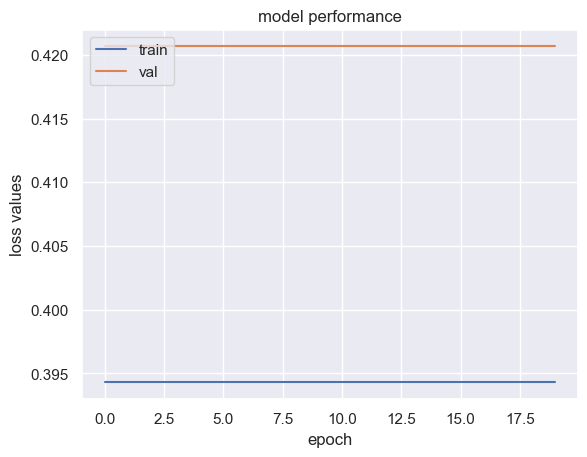

In [24]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

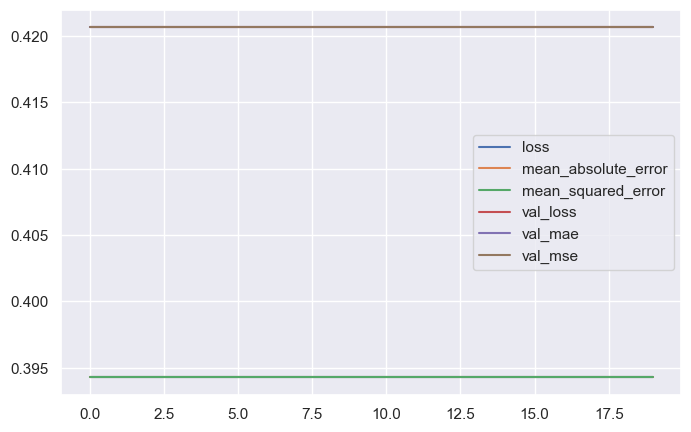

In [25]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [26]:
prediction = best_mlp_model.predict(X_test)

47/47 [==============================] - 0s 2ms/step


In [27]:
prediction[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [31]:
print(y_train)

        state
375986      1
374646      0
374738      1
377753      0
377939      1
...       ...
377442      1
376023      0
374295      0
376856      1
374282      1

[3500 rows x 1 columns]


In [34]:
from sklearn import metrics

In [35]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  0.4206666666666667
MSE:  0.4206666666666667
RMSE:  0.6485882103975269


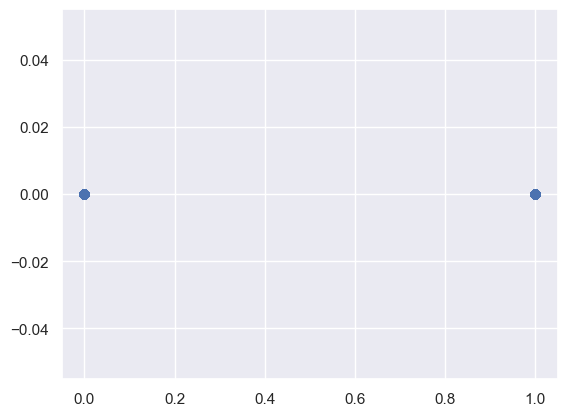

In [36]:
plt.scatter(y_test,prediction)

In [70]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)
    
    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

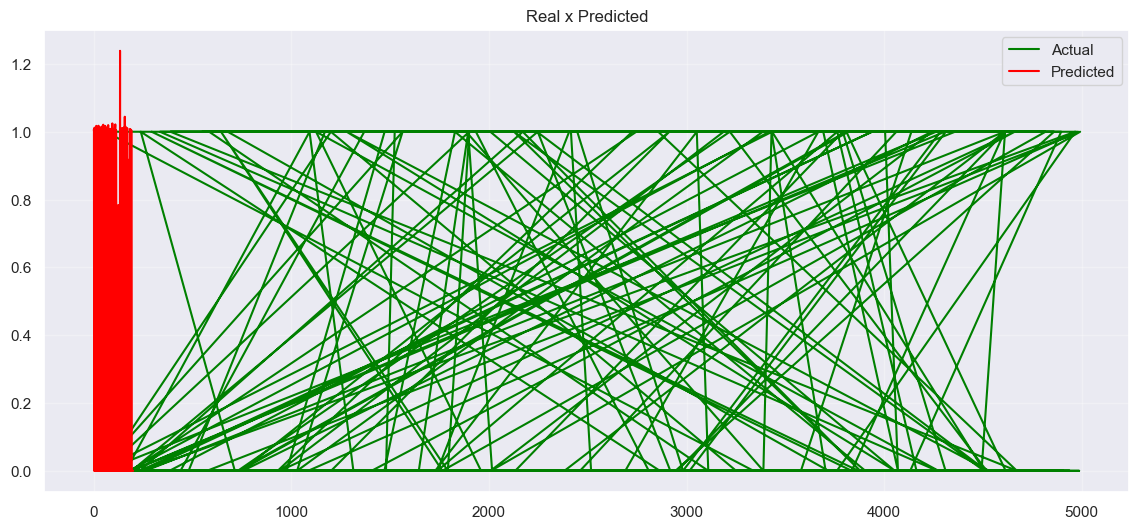

In [71]:
real_predicted_viz(200)

In [39]:
data_dt.describe()

,pledged,state,backers,usd pledged,usd_pledged_real
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,9.782259e+03,0.402200,108.750400,7.958731e+03,9.475140e+03
std,7.164428e+04,0.490391,613.838242,6.954974e+04,7.132917e+04
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,5.000000e+01,0.000000,2.000000,2.600000e+01,5.000000e+01
50%,7.670000e+02,0.000000,15.000000,5.075450e+02,7.775000e+02
75%,4.542500e+03,1.000000,64.250000,3.363250e+03,4.519500e+03
max,3.126115e+06,1.000000,24346.000000,3.126115e+06,3.126115e+06


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns = y.columns)

In [42]:
X.head()

,pledged,backers,usd pledged,usd_pledged_real
372978,125.0,2,125.0,125.0
372979,120.0,3,120.0,120.0
372980,0.0,0,0.0,0.0
372981,1502.0,12,1502.0,1502.0
372983,25.0,1,25.0,25.0


In [43]:
X_scaled.head()

,pledged,backers,usd pledged,usd_pledged_real
0,0.000040,0.000082,0.000040,0.000040
1,0.000038,0.000123,0.000038,0.000038
2,0.000000,0.000000,0.000000,0.000000
3,0.000480,0.000493,0.000480,0.000480
4,0.000008,0.000041,0.000008,0.000008


In [44]:
y.head()

,state
372978,0
372979,0
372980,0
372981,1
372983,0


In [72]:
y_scaled.head()

,state
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=2022)

In [47]:
model = build_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                80        
                                                                 
 dense_61 (Dense)            (None, 8)                 136       
                                                                 
 dense_62 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [48]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split = 0.2, epochs = 20)

In [49]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error',refit = 'True', verbose = 1)

In [50]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Epoch 1/20
80/80 [==============================] - 1s 5ms/step - loss: 0.3995 - mae: 0.3995 - mse: 0.3912 - val_loss: 0.4169 - val_mae: 0.4169 - val_mse: 0.4241
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3991 - mae: 0.3991 - mse: 0.4021 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4262
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3958 - mae: 0.3958 - mse: 0.3878 - val_loss: 0.4119 - val_mae: 0.4119 - val_mse: 0.4105
Epoch 4/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3884 - mae: 0.3884 - mse: 0.3627 - val_loss: 0.4490 - val_mae: 0.4490 - val_mse: 0.2499
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3829 - mae: 0.3829 - mse: 0.3545 - val_loss: 0.3955 - val_mae: 0.3955 - val_mse: 0.3842
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3508 - mae: 0.3508 - mse: 0.3008 - val_loss: 0.3830 - va

80/80 [==============================] - 0s 2ms/step - loss: 0.2035 - mae: 0.2035 - mse: 0.1490 - val_loss: 0.2361 - val_mae: 0.2361 - val_mse: 0.1796
Epoch 11/20
80/80 [==============================] - 0s 2ms/step - loss: 0.1906 - mae: 0.1906 - mse: 0.1417 - val_loss: 0.2190 - val_mae: 0.2190 - val_mse: 0.1621
Epoch 12/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1889 - mae: 0.1889 - mse: 0.1446 - val_loss: 0.1969 - val_mae: 0.1969 - val_mse: 0.1530
Epoch 13/20
80/80 [==============================] - 0s 2ms/step - loss: 0.1864 - mae: 0.1864 - mse: 0.1411 - val_loss: 0.2299 - val_mae: 0.2299 - val_mse: 0.1798
Epoch 14/20
80/80 [==============================] - 0s 2ms/step - loss: 0.1863 - mae: 0.1863 - mse: 0.1426 - val_loss: 0.2336 - val_mae: 0.2336 - val_mse: 0.1828
Epoch 15/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1823 - mae: 0.1823 - mse: 0.1437 - val_loss: 0.2074 - val_mae: 0.2074 - val_mse: 0.1652
Epoch 16/20
80/80 [===============

Epoch 20/20
25/25 [==============================] - 0s 1ms/step
Epoch 1/20
80/80 [==============================] - 1s 5ms/step - loss: 0.3985 - mae: 0.3985 - mse: 0.3923 - val_loss: 0.4142 - val_mae: 0.4142 - val_mse: 0.4183
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3895 - mae: 0.3895 - mse: 0.3694 - val_loss: 0.4007 - val_mae: 0.4007 - val_mse: 0.4677
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3702 - mae: 0.3702 - mse: 0.3293 - val_loss: 0.4110 - val_mae: 0.4110 - val_mse: 0.4661
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3178 - mae: 0.3178 - mse: 0.2627 - val_loss: 0.3138 - val_mae: 0.3138 - val_mse: 0.1728
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2657 - mae: 0.2657 - mse: 0.2026 - val_loss: 0.2478 - val_mae: 0.2478 - val_mse: 0.1854
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2246 - mae: 0.2246 - mse: 0.1591 - val_loss: 0.2141

80/80 [==============================] - 0s 4ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 10/20
80/80 [==============================] - 0s 4ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 11/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 12/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 13/20
80/80 [==============================] - 0s 2ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 14/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4020 - mae: 0.4020 - mse: 0.4020 - val_loss: 0.4186 - val_mae: 0.4186 - val_mse: 0.4184
Epoch 15/20
80/80 [===============

Epoch 19/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4047 - mae: 0.4047 - mse: 0.4047 - val_loss: 0.3922 - val_mae: 0.3922 - val_mse: 0.3922
Epoch 20/20
25/25 [==============================] - 0s 2ms/step
Epoch 1/20
80/80 [==============================] - 1s 5ms/step - loss: 0.3979 - mae: 0.3979 - mse: 0.3965 - val_loss: 0.4157 - val_mae: 0.4157 - val_mse: 0.4221
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3922 - mae: 0.3922 - mse: 0.3923 - val_loss: 0.4078 - val_mae: 0.4078 - val_mse: 0.4201
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3790 - mae: 0.3790 - mse: 0.3540 - val_loss: 0.4068 - val_mae: 0.4068 - val_mse: 0.4144
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3711 - mae: 0.3711 - mse: 0.3429 - val_loss: 0.3520 - val_mae: 0.3520 - val_mse: 0.3131
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3116 - mae: 0.3116 - mse: 0.2460 - val_loss: 0.316

80/80 [==============================] - 0s 3ms/step - loss: 0.1994 - mae: 0.1994 - mse: 0.1429 - val_loss: 0.2323 - val_mae: 0.2323 - val_mse: 0.1902
Epoch 9/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2005 - mae: 0.2005 - mse: 0.1533 - val_loss: 0.2079 - val_mae: 0.2079 - val_mse: 0.1596
Epoch 10/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1952 - mae: 0.1952 - mse: 0.1522 - val_loss: 0.2283 - val_mae: 0.2283 - val_mse: 0.1930
Epoch 11/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1892 - mae: 0.1892 - mse: 0.1496 - val_loss: 0.2107 - val_mae: 0.2107 - val_mse: 0.1747
Epoch 12/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2000 - mae: 0.2000 - mse: 0.1629 - val_loss: 0.1911 - val_mae: 0.1911 - val_mse: 0.1362
Epoch 13/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1753 - mae: 0.1753 - mse: 0.1412 - val_loss: 0.2076 - val_mae: 0.2076 - val_mse: 0.1770
Epoch 14/20
80/80 [================

Epoch 18/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1786 - mae: 0.1786 - mse: 0.1422 - val_loss: 0.1959 - val_mae: 0.1959 - val_mse: 0.1511
Epoch 19/20
80/80 [==============================] - 0s 3ms/step - loss: 0.1763 - mae: 0.1763 - mse: 0.1432 - val_loss: 0.1953 - val_mae: 0.1953 - val_mse: 0.1689
Epoch 20/20
25/25 [==============================] - 0s 2ms/step
Epoch 1/20
100/100 [==============================] - 1s 5ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_loss: 0.4162 - val_mae: 0.4162 - val_mse: 0.4162
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4022 - mae: 0.4022 - mse: 0.4022 - val_lo

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=20, model=<function build_model at 0x0000028FCC65BCE0>, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [51]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: -0.173999 using {'optimizer': 'Adagrad'}


In [52]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [53]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" %(mean, stdev,param))

-0.320664 (0.103399) with {'optimizer': 'SGD'}
-0.271023 (0.113623) with {'optimizer': 'RMSprop'}
-0.173999 (0.007177) with {'optimizer': 'Adagrad'}


In [54]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x0000028FCC65BCE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)


In [55]:
best_mlp_model.fit(X_train, y_train, epochs =20, validation_data = (X_test, y_test), verbose =1)

Epoch 1/20
125/125 [==============================] - 2s 5ms/step - loss: 0.3954 - mae: 0.3954 - mse: 0.4056 - val_loss: 0.3674 - val_mae: 0.3674 - val_mse: 0.2751
Epoch 2/20
125/125 [==============================] - 0s 3ms/step - loss: 0.3329 - mae: 0.3329 - mse: 0.2797 - val_loss: 0.2550 - val_mae: 0.2550 - val_mse: 0.1947
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2468 - mae: 0.2468 - mse: 0.1804 - val_loss: 0.2046 - val_mae: 0.2046 - val_mse: 0.1474
Epoch 4/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2122 - mae: 0.2122 - mse: 0.1542 - val_loss: 0.2019 - val_mae: 0.2019 - val_mse: 0.1300
Epoch 5/20
125/125 [==============================] - 0s 3ms/step - loss: 0.2046 - mae: 0.2046 - mse: 0.1480 - val_loss: 0.2351 - val_mae: 0.2351 - val_mse: 0.1306
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.1952 - mae: 0.1952 - mse: 0.1502 - val_loss: 0.1790 - val_mae: 0.1790 - val_mse: 0.1419
Epoch 7/20
125/1

KerasRegressor(
	model=<function build_model at 0x0000028FCC65BCE0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
)

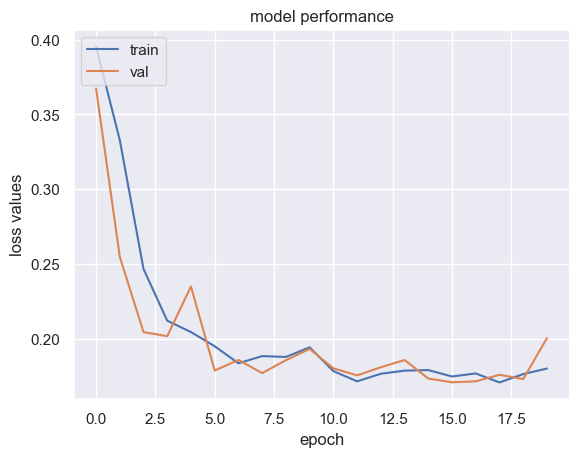

In [56]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

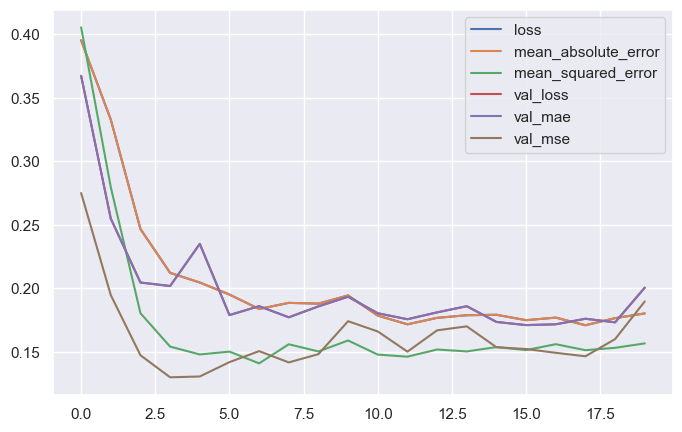

In [57]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [58]:
prediction = best_mlp_model.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [59]:
prediction[0:5]

array([[1.0049887],
       [1.0066668],
       [0.       ],
       [0.       ],
       [1.0120114]], dtype=float32)

In [62]:
predictions_unscaled = scaler_y.inverse_transform(prediction)

In [63]:
predictions_unscaled[0:5]

array([[1.0049887],
       [1.0066668],
       [0.       ],
       [0.       ],
       [1.0120114]], dtype=float32)

In [64]:
predictions_unscaled_test = scaler_y.inverse_transform(y_test)

In [65]:
predictions_unscaled_test[0:5]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [66]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  0.2005898677930236
MSE:  0.18972770147934442
RMSE:  0.4355774345387332


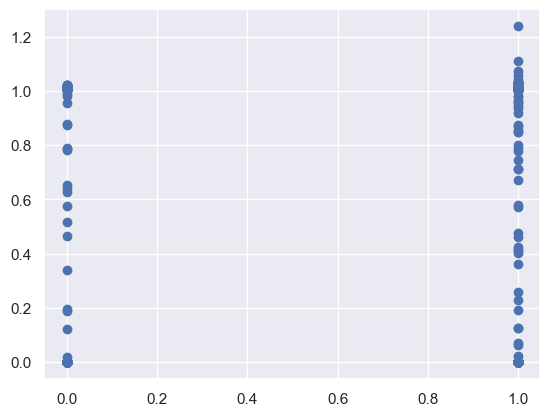

In [67]:
plt.scatter(y_test,prediction)

In [68]:
def real_predict_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(predictions_unscaled_test[:limit], color = 'green', label = 'Actual')
    plt.plot(predictions_unscaled[:limit], color = 'red', label = 'Predicted')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Prices')
    plt.title('predicted vs real')
    plt.legend()
    plt.show()

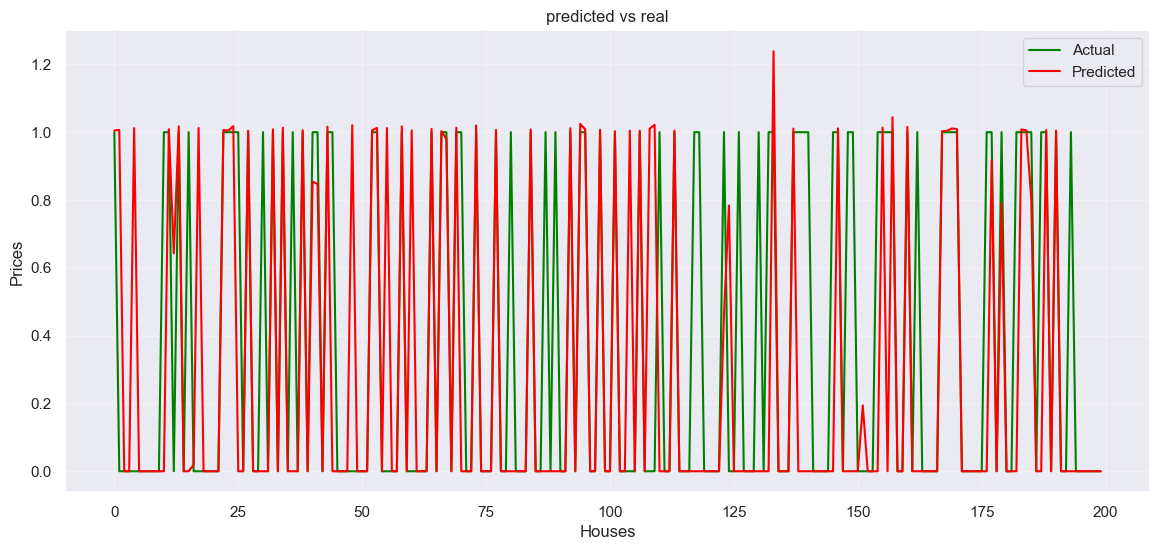

In [69]:
real_predict_viz(200)